In [1]:
## Importing the relevant packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import mean

In [2]:
data_df = pd.read_csv("consumer_survey_data.csv")
print(len(data_df))
data_df.head()

4039


,ResponseId,UserLanguage,consent,age,gender,residence,US_citizen,newspapers,news_sources,platforms_used,...,attitudes_trust_agree,attitudes_recommend_agree,attitudes_responsible_agree,weight_diff_category,weight_diff_negative,switched_categories,switch_misinfo_mag,outcome_1_topic,outcome_2_topic,weights_difference
0,R_3FJULEzqqhsZCET,EN,4,2,2,3,1,"9,11,27,17,18,26,36",3,"(1, 2, 3)",...,1,1,0,same weight,0,0,0,Product features,Best option,10
1,R_1jMWAyzHxYiHuR6,EN,4,3,2,3,1,"33,4,26",3,"(1, 2, 3, 4)",...,1,1,1,same weight,0,0,0,Product features,Misinformation concerns,20
2,R_12KhjtDoZRVn3Eo,EN,4,3,2,3,1,"2,4,11,14,16,17,18,26",2,"(1, 2, 3, 4, 5)",...,1,1,1,same weight,0,0,0,Use,Company responsibility,0
3,R_2c7cUHqNoppI0l1,EN,4,4,2,1,1,36,2,"(1, 2, 3)",...,1,1,1,same weight,0,0,0,Frequency of use,Company responsibility,40
4,R_1FLeC52n7IIbiLD,EN,4,6,1,2,1,9,3,1,...,1,1,0,same weight,0,0,0,Product features,No interest,0


#### Quantifying the cost of shifting preferences for the treated group:

In [11]:
print(len(data_df))

treated_df = data_df[(data_df['group'] == "T1") | (data_df['group'] == "T3") | (data_df['group'] == "T4")]
print(len(treated_df))

control_df = data_df[(data_df['group'] == "control") | (data_df['group'] == "T2")]
print(len(control_df))

4039
2431
1608


In [12]:
print(len(data_df))

switched_df = data_df[data_df['switch_in_preference'] == 1]
print(len(switched_df))

treated_switched_df = switched_df[(switched_df['group'] == "T1") | 
                                  (switched_df['group'] == "T3") | (switched_df['group'] == "T4")]
print(len(treated_switched_df))

control_switched_df = switched_df[(switched_df['group'] == "control") | (switched_df['group'] == "T2")]
print(len(control_switched_df))

4039
430
345
85


In [18]:
data_df = treated_switched_df
print(len(data_df))

345


In [19]:
data_df["weight_of_top_choice"].mean(), data_df["weight_of_top_choice"].median()

(39.11304347826087, 35.0)

In [20]:
data_df["weight_of_outcome"].mean(), data_df["weight_of_outcome"].median()

(23.715942028985506, 20.0)

In [21]:
top_choice_weights_df = pd.DataFrame(data_df["weight_of_top_choice"].value_counts())
top_choice_weights_df = top_choice_weights_df.reset_index()
top_choice_weights_df = top_choice_weights_df.rename(columns = {'index': 'weight_of_top_choice', 
                                                                'weight_of_top_choice': 'number_of_values'})
print(len(top_choice_weights_df))
top_choice_weights_df.head()

28


,weight_of_top_choice,number_of_values
0,50,64
1,30,49
2,40,45
3,20,42
4,25,36


In [22]:
outcome_weights_df = pd.DataFrame(data_df["weight_of_outcome"].value_counts())
outcome_weights_df = outcome_weights_df.reset_index()
outcome_weights_df = outcome_weights_df.rename(columns = {'index': 'weight_of_outcome', 'weight_of_outcome': 'number_of_values'})
print(len(outcome_weights_df))
outcome_weights_df.head()

24


,weight_of_outcome,number_of_values
0,20,96
1,30,49
2,25,47
3,10,38
4,0,25


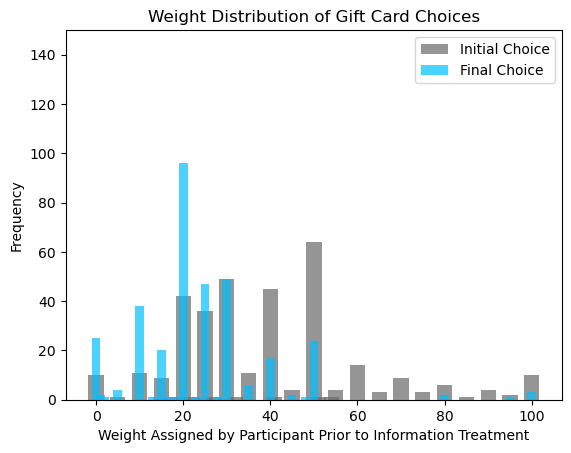

In [25]:
import matplotlib.pyplot as plt

# Create a bar plot for the first dataset
plt.bar(top_choice_weights_df['weight_of_top_choice'], top_choice_weights_df['number_of_values'], color='dimgray', 
        alpha=0.7, label='Initial Choice',  width = 3.5)

# Create a bar plot for the second dataset, but with a small shift in x-coordinate to overlay them
plt.bar(outcome_weights_df['weight_of_outcome'], outcome_weights_df['number_of_values'], color='deepskyblue', 
        alpha=0.7, label='Final Choice',  width = 2.0)   

plt.title('Weight Distribution of Gift Card Choices')
plt.xlabel('Weight Assigned by Participant Prior to Information Treatment')
plt.ylabel('Frequency')

# Set the y-axis limits to ensure it goes up to the desired value
plt.ylim(0, 150)

# Add a legend to differentiate the two datasets
plt.legend()

plt.show()